# Sebastian Vettel
<img src="https://www.formula1.com/content/fom-website/en/drivers/sebastian-vettel/_jcr_content/image.img.1920.medium.jpg/1646818813887.jpg" width="300">

### Team: Aston Martin
<img src ="https://www.formula1.com/content/fom-website/en/drivers/sebastian-vettel/_jcr_content/helmet.img.png/1646824978505.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

vet_laps <- lap_data %>%
            filter(driverId == 20)

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
4,57
863,57
883,57
902,57
929,57
971,57
990,57
1011,57
1045,56


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5717223,95.28705,1.588118


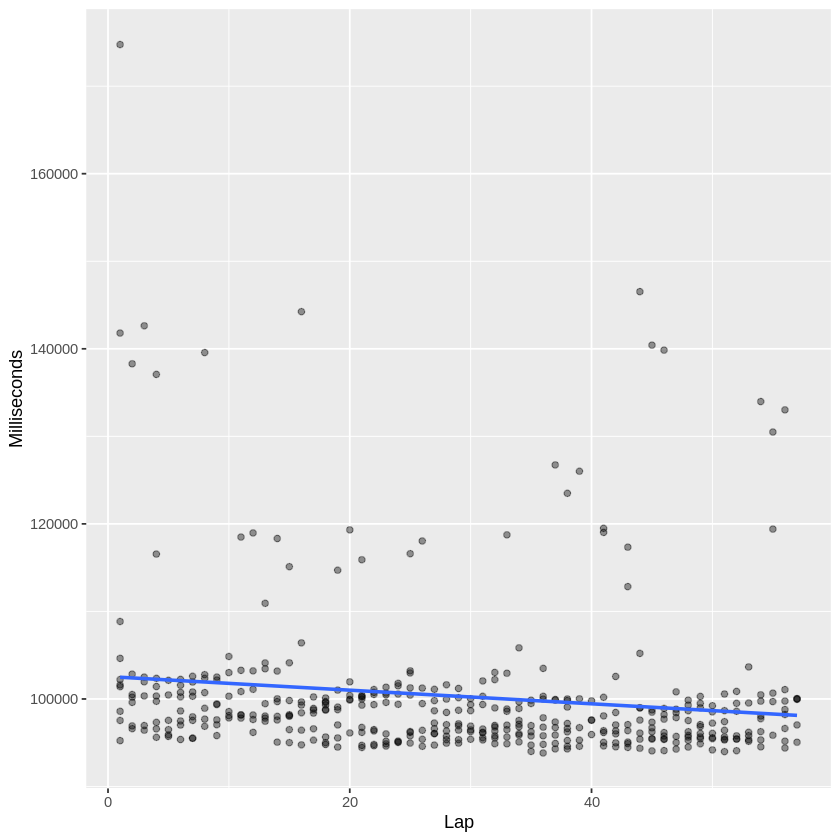

In [4]:
#1. Bahrain 

sv_bahrain <- vet_laps %>%
                filter(raceId %in% bahrain_race_ID) 

sv_bahrain_clean <- sv_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter (n != 49) %>%
                        filter (n != 87)
sv_bahrain_clean
sv_bahrain_clean_ID <- sv_bahrain_clean %>%
                        pull(raceId)

### SPLITTING DATA

sv_bahrain_races <- vet_laps %>%
                    filter(raceId %in% sv_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(sv_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1072,44


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5381163,89.68605,1.494767


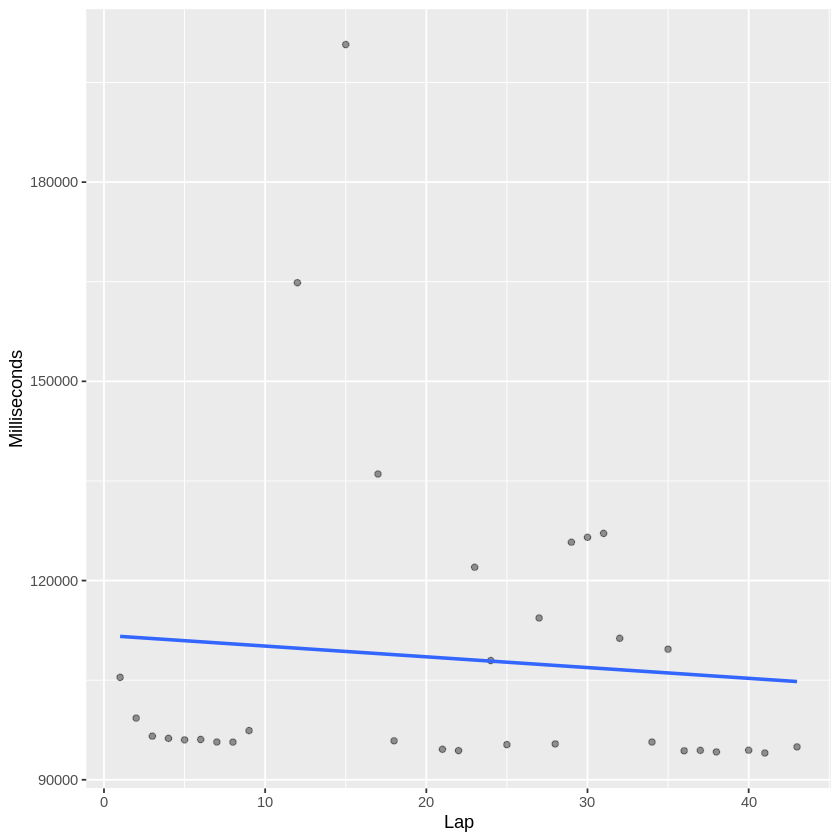

In [5]:
#2. Saudi Arabia

sv_sa <- vet_laps %>%
                filter(raceId %in% saudi_race_ID) 

sv_sa_clean <- sv_sa %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_sa_clean
sv_sa_clean_ID <- sv_sa_clean %>%
                        pull(raceId)

sv_sa_races <- vet_laps %>%
                    filter(raceId %in% sv_sa_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(sv_sa_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_sa_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
841,58
860,58
880,58
926,58
989,58
1010,58
948,57
969,57
1,56


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5394635,89.91058,1.49851


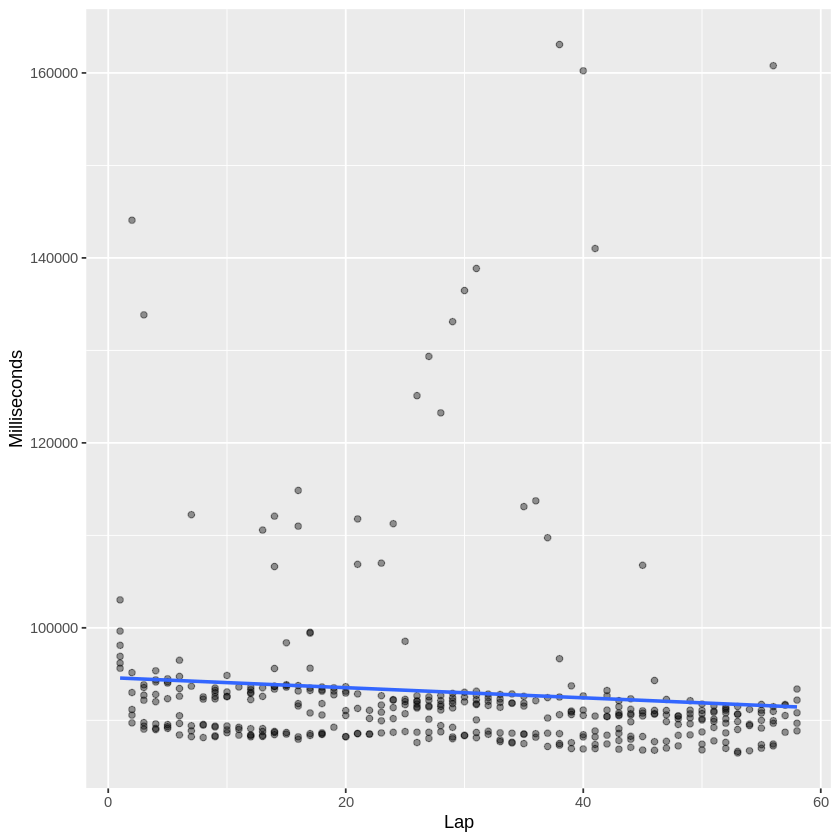

In [6]:
#3. Austrailia

sv_aus <- vet_laps %>%
                filter(raceId %in% aus_race_ID) 

sv_aus_clean <- sv_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 25) %>%
                        filter(n != 3)
sv_aus_clean
sv_aus_clean_ID <- sv_aus_clean %>%
                        pull(raceId)

sv_aus_races <- vet_laps %>%
                    filter(raceId %in% sv_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(sv_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63
1053,61


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5616568,93.60946,1.560158


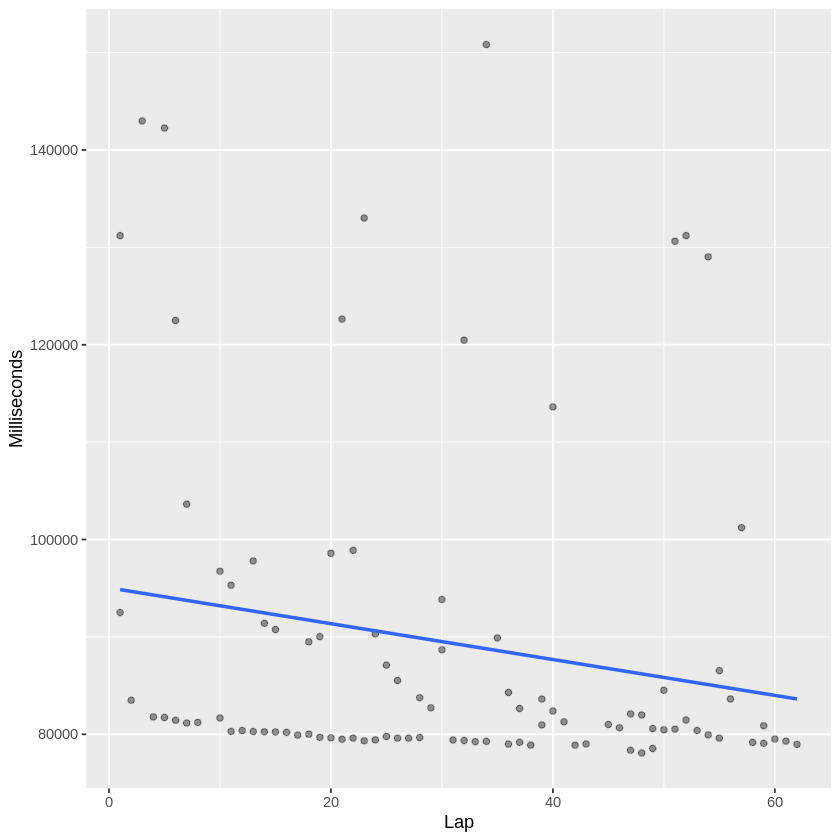

In [7]:
#4. Imola, Italy

sv_imola <- vet_laps %>%
                filter(raceId %in% imola_race_ID) 

sv_imola_clean <- sv_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_imola_clean
sv_imola_clean_ID <- sv_imola_clean %>%
                        pull(raceId)

sv_imola_races <- vet_laps %>%
                    filter(raceId %in% sv_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
7,58
844,58
1044,58
22,57
47,57
1067,57
343,39


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5391492,89.8582,1.497637


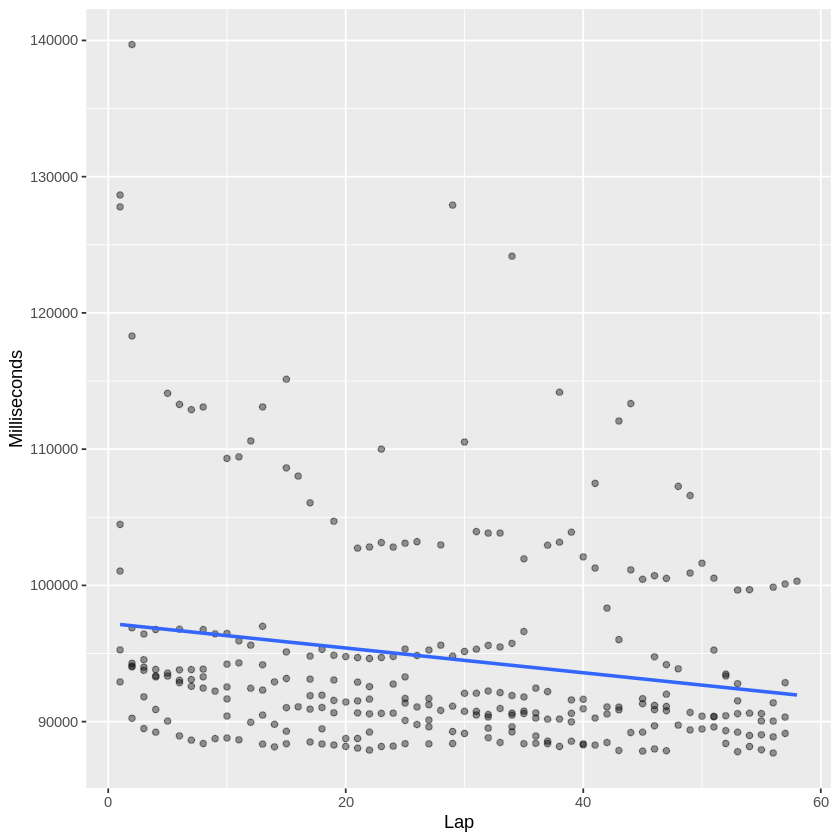

In [8]:
#5. Turkey (Replacing Miami)

sv_turkey <- vet_laps %>%
                filter(raceId %in% turkey_race_ID) 

sv_turkey_clean <- sv_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_turkey_clean
sv_turkey_clean_ID <- sv_turkey_clean %>%
                        pull(raceId)

sv_turkey_races <- vet_laps %>%
                    filter(raceId %in% sv_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
5,66
341,66
845,66
864,66
884,66
904,66
930,66
952,66
973,66


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5900288,98.33813,1.638969


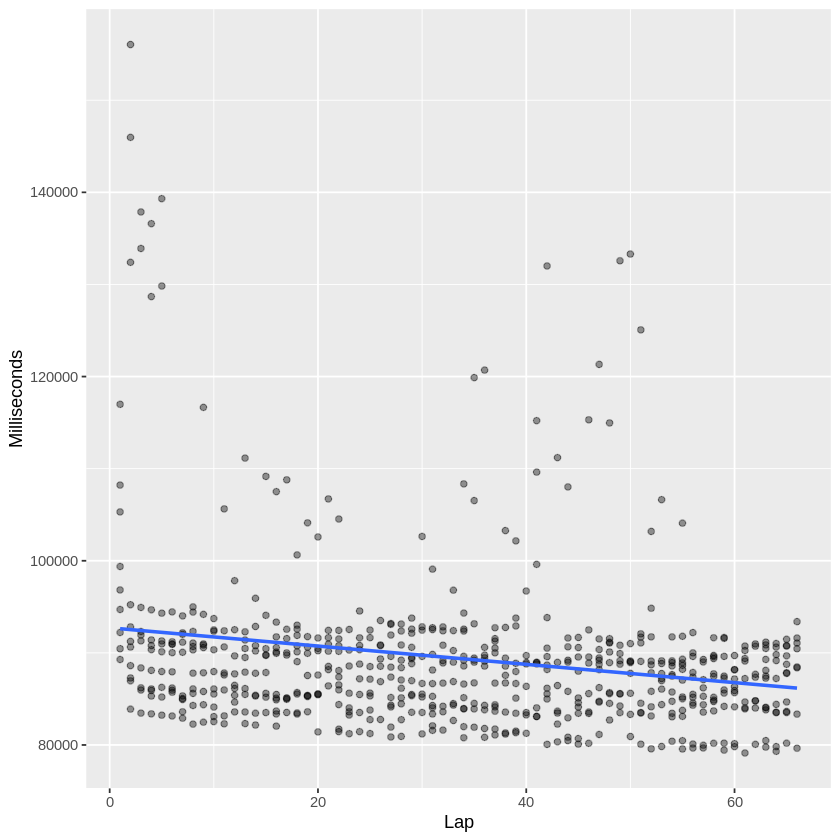

In [9]:
#6. Spain

sv_spain <- vet_laps %>%
                filter(raceId %in% spain_race_ID) 

sv_spain_clean <- sv_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_spain_clean
sv_spain_clean_ID <- sv_spain_clean %>%
                        pull(raceId)

sv_spain_races <- vet_laps %>%
                    filter(raceId %in% sv_spain_clean_ID)

formulaone_split <- initial_split(sv_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
342,78
846,78
865,78
885,78
931,78
953,78
974,78
994,78
1015,78


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6482837,108.0473,1.800788


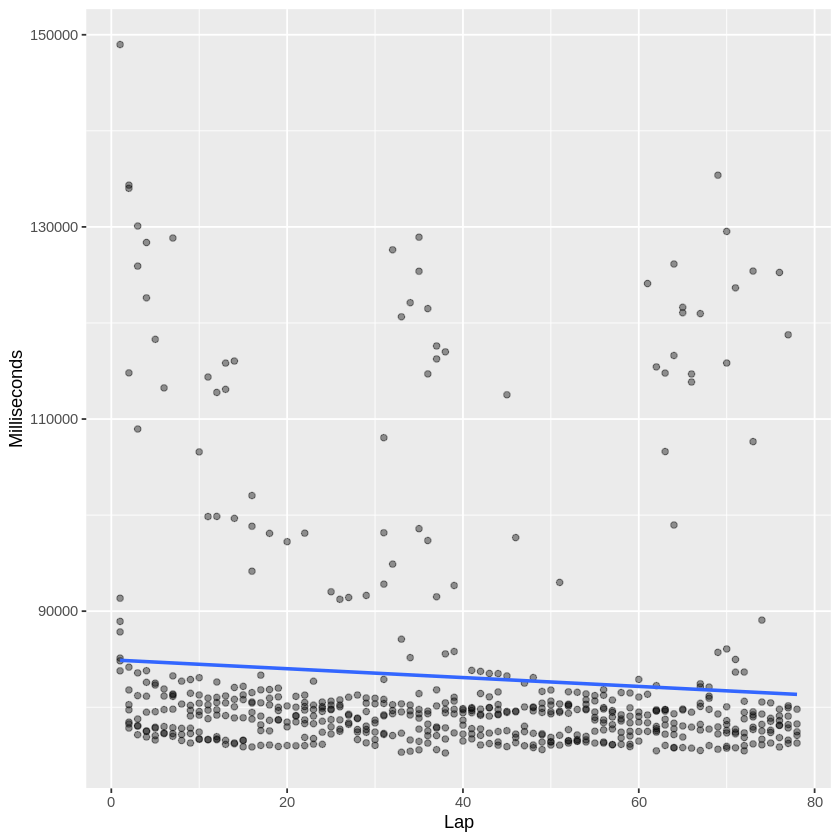

In [10]:
#7. Monaco

sv_monaco <- vet_laps %>%
                filter(raceId %in% monaco_race_ID) 

sv_monaco_clean <- sv_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(n=10)
sv_monaco_clean
sv_monaco_clean_ID <- sv_monaco_clean %>%
                        pull(raceId)

sv_monaco_races <- vet_laps %>%
                    filter(raceId %in% sv_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(sv_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
955,51
976,51
992,51
1013,51
1057,51


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5921823,98.69705,1.644951


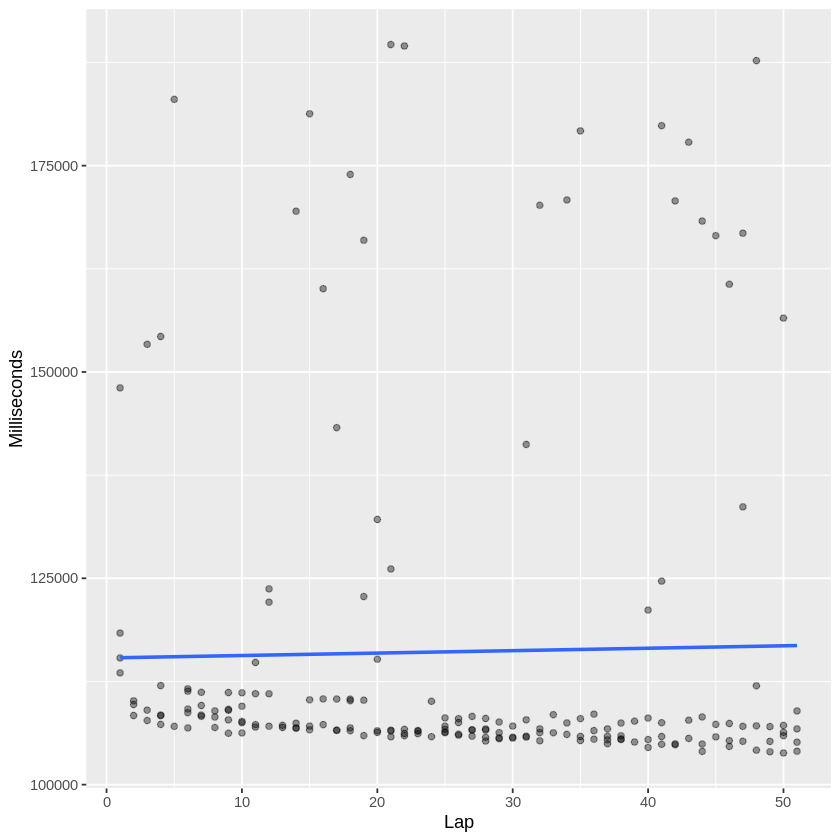

In [11]:
#8. Azerbaijan

sv_azerbaijan <- vet_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

sv_azerbaijan_clean <- sv_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_azerbaijan_clean
sv_azerbaijan_clean_ID <- sv_azerbaijan_clean %>%
                        pull(raceId)

sv_azerbaijan_races <- vet_laps %>%
                    filter(raceId %in% sv_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(sv_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
24,70
344,70
847,70
866,70
886,70
906,70
932,70
954,70
975,70


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5801698,96.69497,1.611583


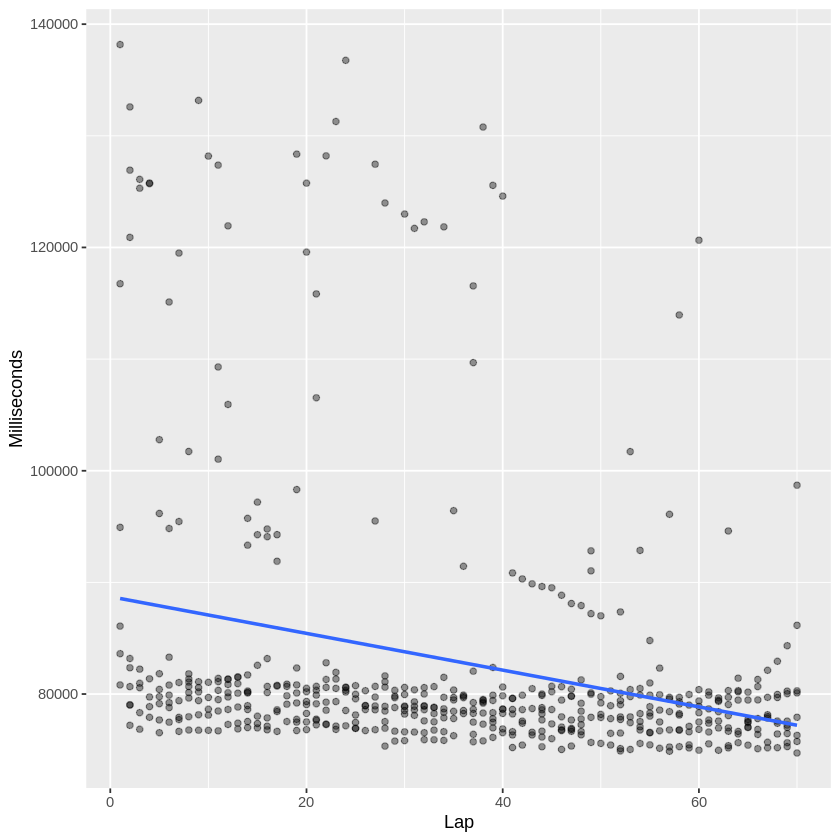

In [12]:
#9. Canada

sv_canada <- vet_laps %>%
                filter(raceId %in% canada_race_ID) 

sv_canada_clean <- sv_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(10)
sv_canada_clean
sv_canada_clean_ID <- sv_canada_clean %>%
                        pull(raceId)

sv_canada_races <- vet_laps %>%
                    filter(raceId %in% sv_canada_clean_ID)

formulaone_split <- initial_split(sv_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
346,52
849,52
868,52
908,52
934,52
957,52
998,52
1034,52
1035,52


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5671747,94.52911,1.575485


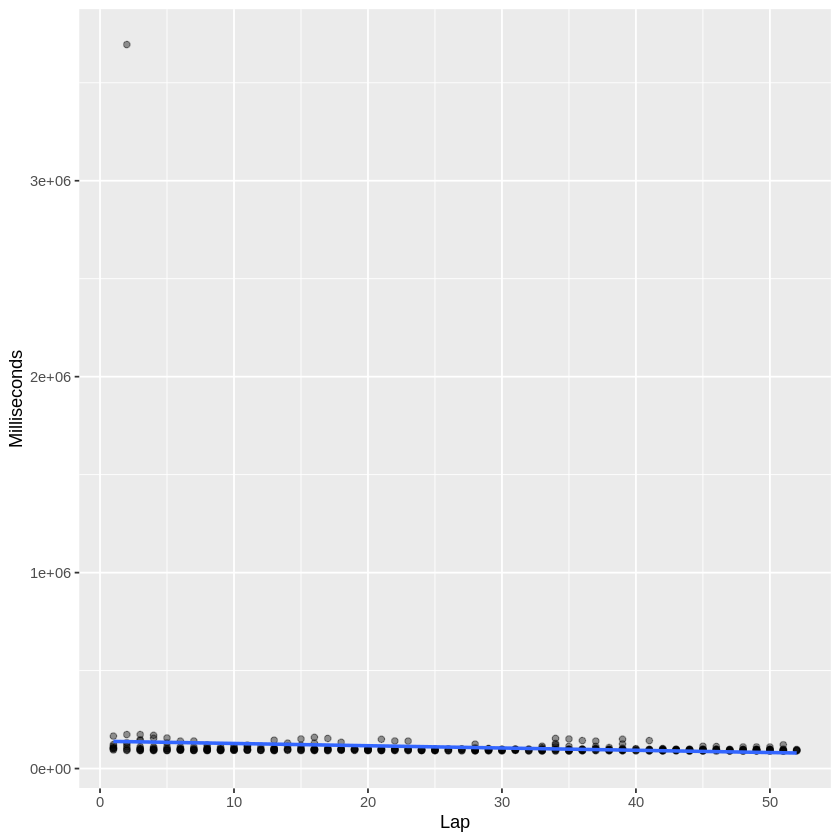

In [13]:
#10. Great Britain

sv_uk <- vet_laps %>%
                filter(raceId %in% uk_race_ID) 

sv_uk_clean <- sv_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(12) %>%
                        filter(n != 60)
sv_uk_clean
sv_uk_clean_ID <- sv_uk_clean %>%
                        pull(raceId)

sv_uk_races <- vet_laps %>%
                    filter(raceId %in% sv_uk_clean_ID)

formulaone_split <- initial_split(sv_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
933,71
977,71
997,71
1018,71
1031,71
1058,70
1060,69


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5110151,85.16918,1.419486


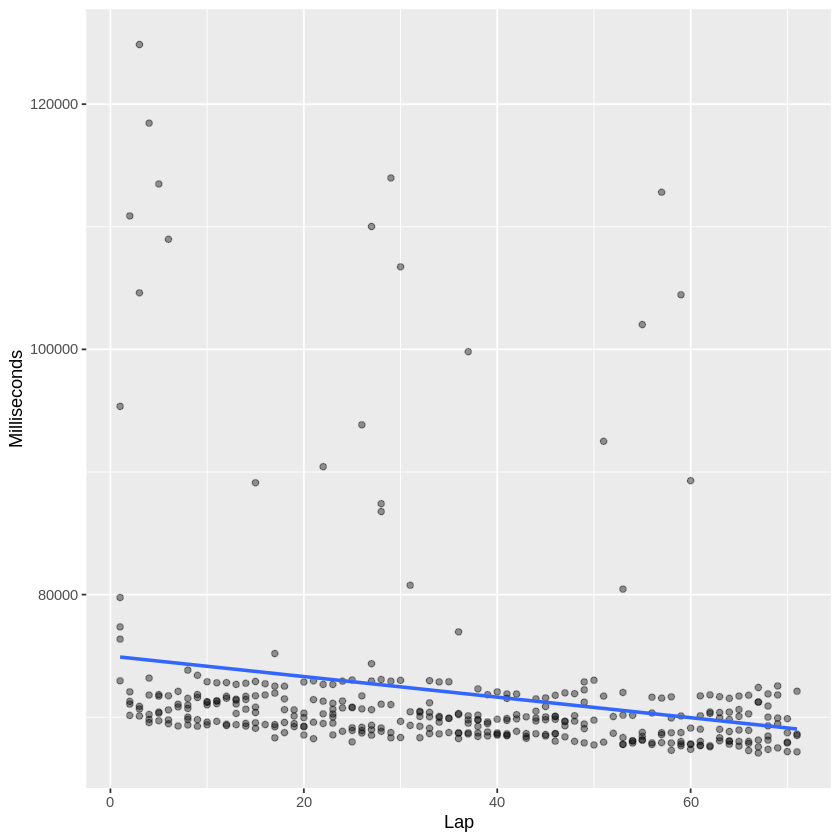

In [14]:
#11. Austria

sv_austria <- vet_laps %>%
                filter(raceId %in% austria_race_ID) 

sv_austria_clean <- sv_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(7)
sv_austria_clean
sv_austria_clean_ID <- sv_austria_clean %>%
                        pull(raceId) 

sv_austria_races <- vet_laps %>%
                    filter(raceId %in% sv_austria_clean_ID)

formulaone_split <- initial_split(sv_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

In [15]:
# #12. France

# sv_france <- vet_laps %>%
#                 filter(raceId %in% france_race_ID) 

# sv_france_clean <- sv_france %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n))
# sv_france_clean
# sv_france_clean_ID <- sv_france_clean %>%
#                         pull(raceId)

# sv_france_races <- vet_laps %>%
#                     filter(raceId %in% sv_france_clean_ID) %>%
#                     arrange(by = desc(milliseconds)) %>%
#                     slice(2:1000)

# formulaone_split <- initial_split(sv_france_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

# ### GETS PREDICTION

# get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
348,70
851,70
890,70
910,70
958,70
979,70
1000,70
1021,70
1062,70


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6127492,102.1249,1.702081


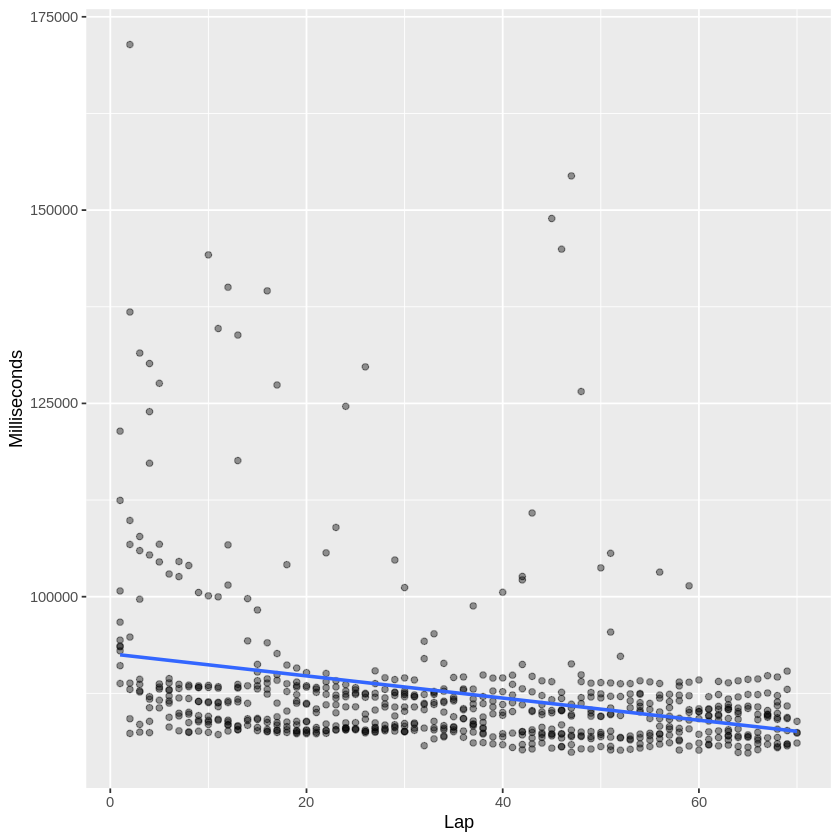

In [16]:
#13. Hungary

sv_hungary <- vet_laps %>%
                filter(raceId %in% hungary_race_ID) 

sv_hungary_clean <- sv_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(13)
sv_hungary_clean
sv_hungary_clean_ID <- sv_hungary_clean %>%
                        pull(raceId)

sv_hungary_races <- vet_laps %>%
                    filter(raceId %in% sv_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
12,44
30,44
852,44
871,44
891,44
911,44
960,44
980,44
1001,44


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5157622,85.96037,1.432673


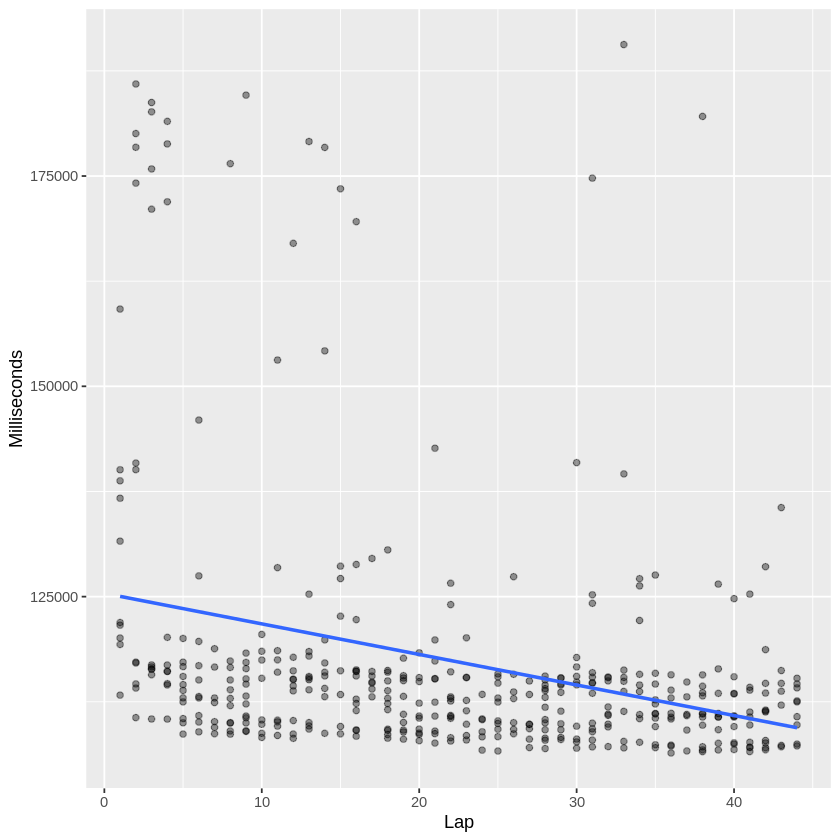

In [17]:
#14. Belgium

sv_belgium <- vet_laps %>%
                filter(raceId %in% belgium_race_ID) 

sv_belgium_clean <- sv_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(13)
sv_belgium_clean
sv_belgium_clean_ID <- sv_belgium_clean %>%
                        pull(raceId)

sv_belgium_races <- vet_laps %>%
                    filter(raceId %in% sv_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5579439,92.99065,1.549844


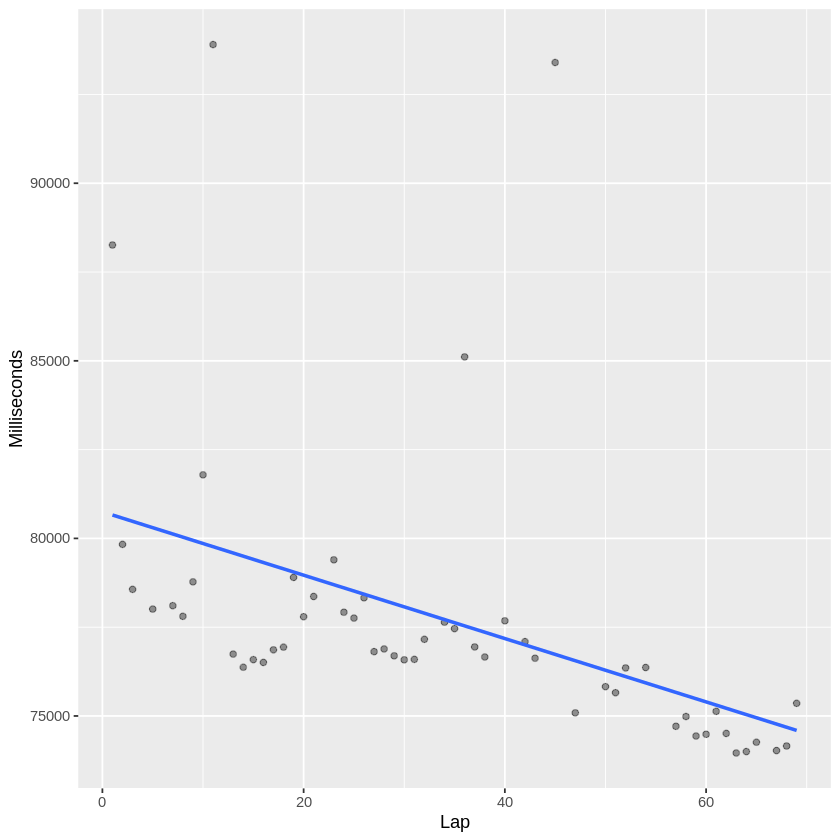

In [18]:
#15. Netherlands

sv_netherlands <- vet_laps %>%
                filter(raceId %in% netherlands_race_ID) 

sv_netherlands_clean <- sv_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_netherlands_clean
sv_netherlands_clean_ID <- sv_netherlands_clean %>%
                        pull(raceId)

sv_netherlands_races <- vet_laps %>%
                    filter(raceId %in% sv_netherlands_clean_ID)

formulaone_split <- initial_split(sv_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
13,53
31,53
350,53
853,53
892,53
912,53
938,53
961,53
981,53


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4761509,79.35848,1.322641


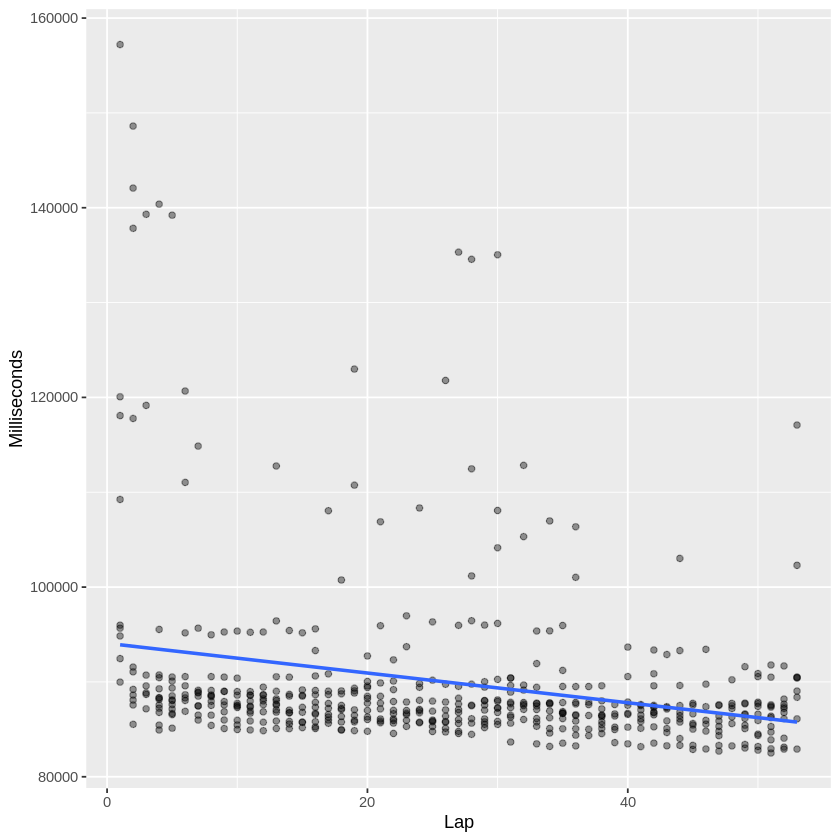

In [19]:
#16. Monza, Italy

sv_monza <- vet_laps %>%
                filter(raceId %in% monza_race_ID) 

sv_monza_clean <- sv_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(13)
sv_monza_clean
sv_monza_clean_ID <- sv_monza_clean %>%
                        pull(raceId)

sv_monza_races <- vet_laps %>%
                    filter(raceId %in% sv_monza_clean_ID)

formulaone_split <- initial_split(sv_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
14,61
32,61
351,61
854,61
893,61
939,61
962,61
1003,61
1024,61


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
7101531,118.3589,1.972648


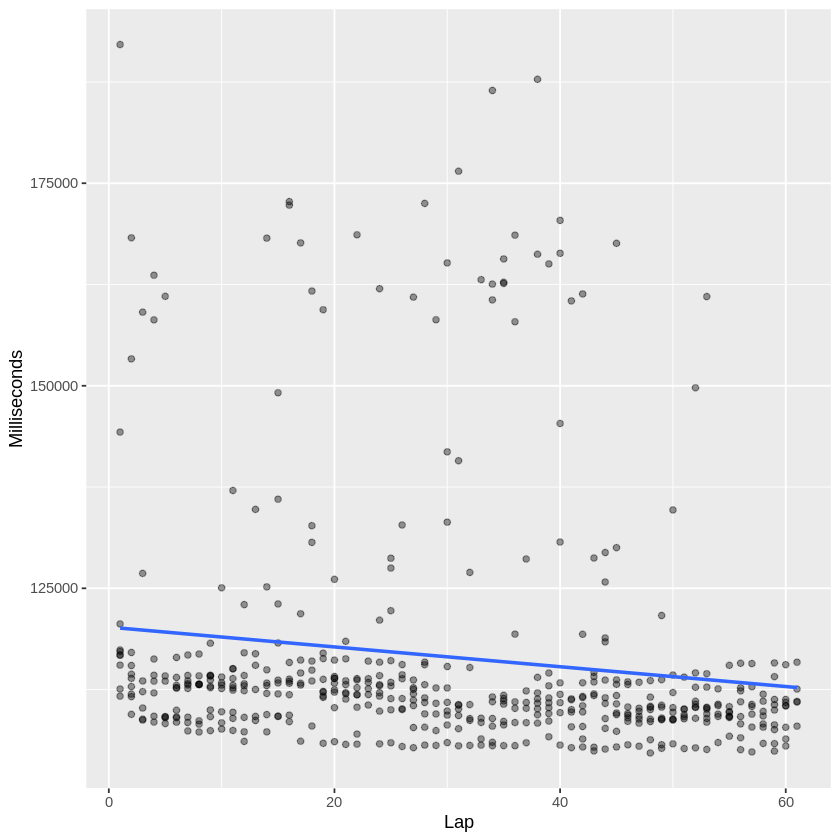

In [20]:
#17. Singapore

sv_singapore <- vet_laps %>%
                filter(raceId %in% singapore_race_ID) 

sv_singapore_clean <- sv_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_singapore_clean
sv_singapore_clean_ID <- sv_singapore_clean %>%
                        pull(raceId)

sv_singapore_races <- vet_laps %>%
                    filter(raceId %in% sv_singapore_clean_ID)

formulaone_split <- initial_split(sv_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
15,53
352,53
855,53
874,53
895,53
940,53
964,53
1005,53
1026,52


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5297723,88.29539,1.47159


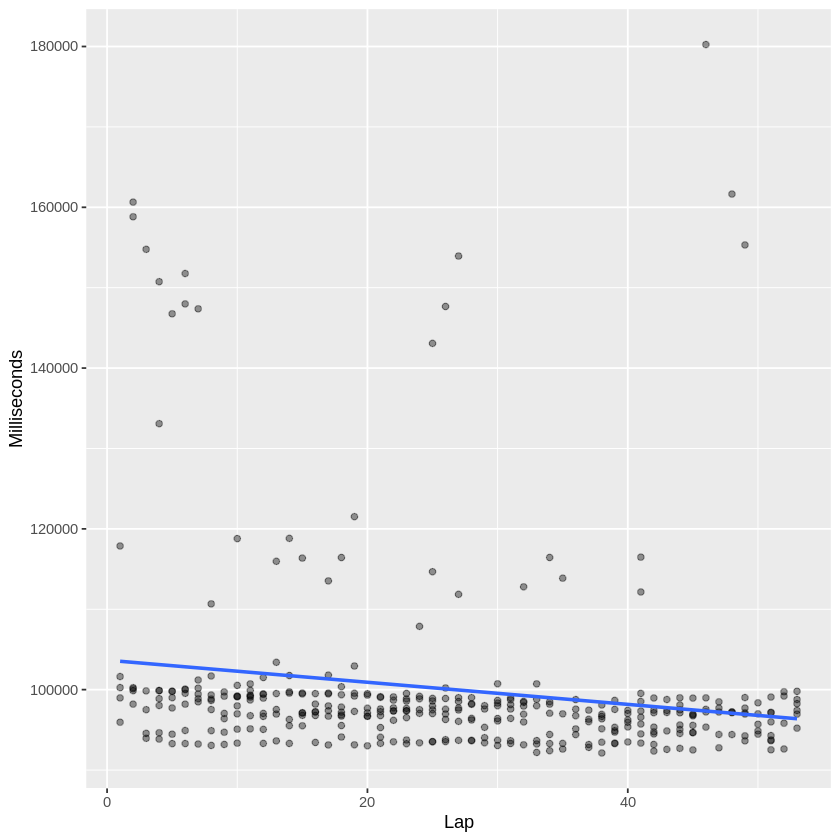

In [21]:
#18. Japan

sv_japan <- vet_laps %>%
                filter(raceId %in% japan_race_ID) 

sv_japan_clean <- sv_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(9)
sv_japan_clean
sv_japan_clean_ID <- sv_japan_clean %>%
                        pull(raceId)

sv_japan_races <- vet_laps %>%
                    filter(raceId %in% sv_japan_clean_ID)

formulaone_split <- initial_split(sv_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
878,56
898,56
916,56
942,56
965,56
985,56
1006,56
1069,55


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5969115,99.48525,1.658087


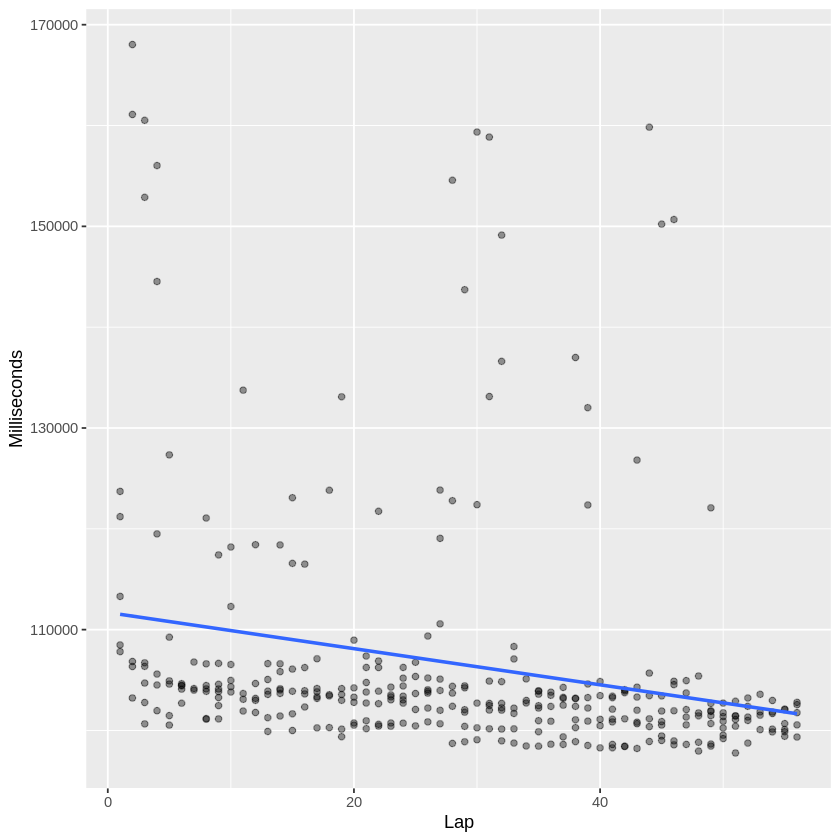

In [22]:
#19. Austin

sv_austin <- vet_laps %>%
                filter(raceId %in% austin_race_ID) 

sv_austin_clean <- sv_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(8)
sv_austin_clean
sv_austin_clean_ID <- sv_austin_clean %>%
                        pull(raceId)

sv_austin_races <- vet_laps %>%
                    filter(raceId %in% sv_austin_clean_ID)

formulaone_split <- initial_split(sv_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
966,71
986,71
1007,71
1027,71
1070,70


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5931083,98.85138,1.647523


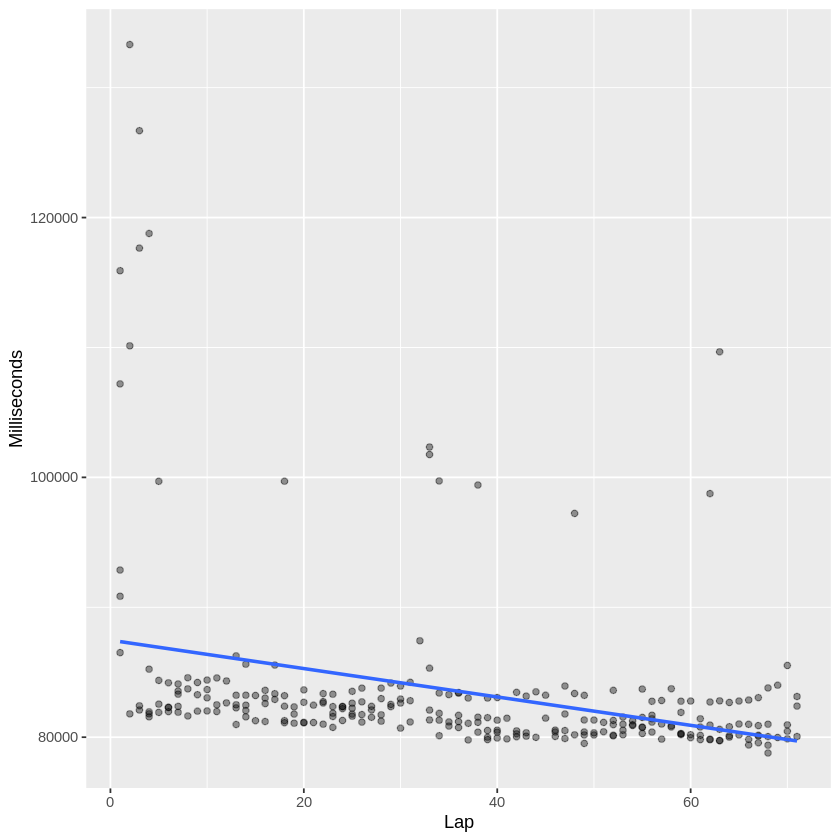

In [23]:
#20. Mexico

sv_mexico <- vet_laps %>%
                filter(raceId %in% mexico_race_ID) 

sv_mexico_clean <- sv_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(5)
sv_mexico_clean
sv_mexico_clean_ID <- sv_mexico_clean %>%
                        pull(raceId)

sv_mexico_races <- vet_laps %>%
                    filter(raceId %in% sv_mexico_clean_ID)

formulaone_split <- initial_split(sv_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
16,71
35,71
354,71
859,71
879,71
899,71
917,71
944,71
967,71


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5773544,96.22574,1.603762


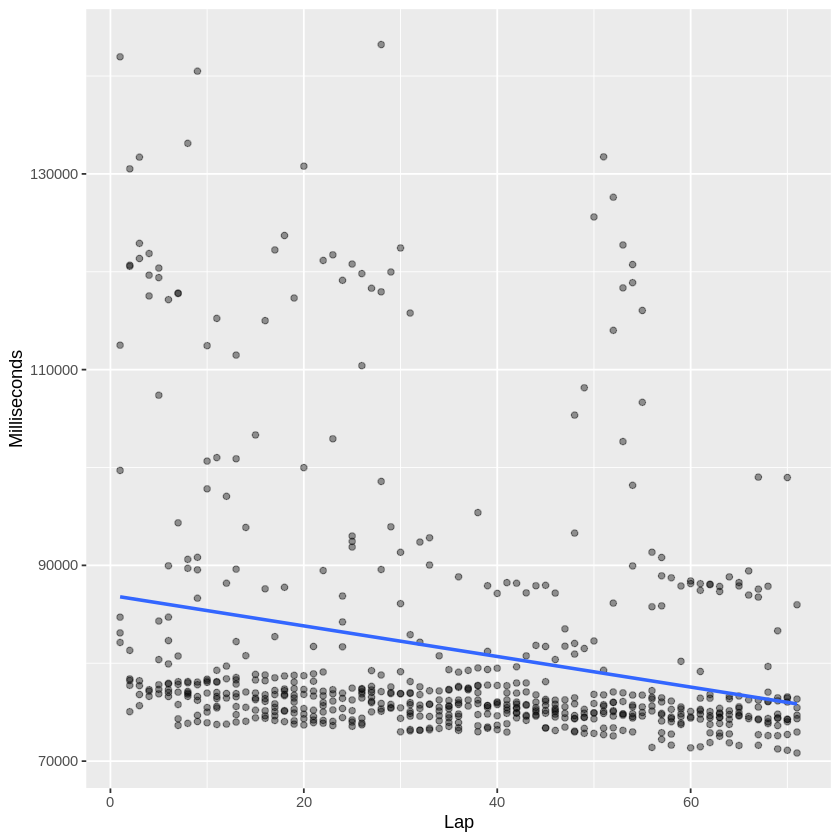

In [24]:
#21. Brazil

sv_brazil <- vet_laps %>%
                filter(raceId %in% brazil_race_ID) 

sv_brazil_clean <- sv_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(12)
sv_brazil_clean
sv_brazil_clean_ID <- sv_brazil_clean %>%
                        pull(raceId)

sv_brazil_races <- vet_laps %>%
                    filter(raceId %in% sv_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(sv_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
17,55
355,55
877,55
897,55
918,55
945,55
968,55
988,55
1009,55


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6214766,103.5794,1.726324


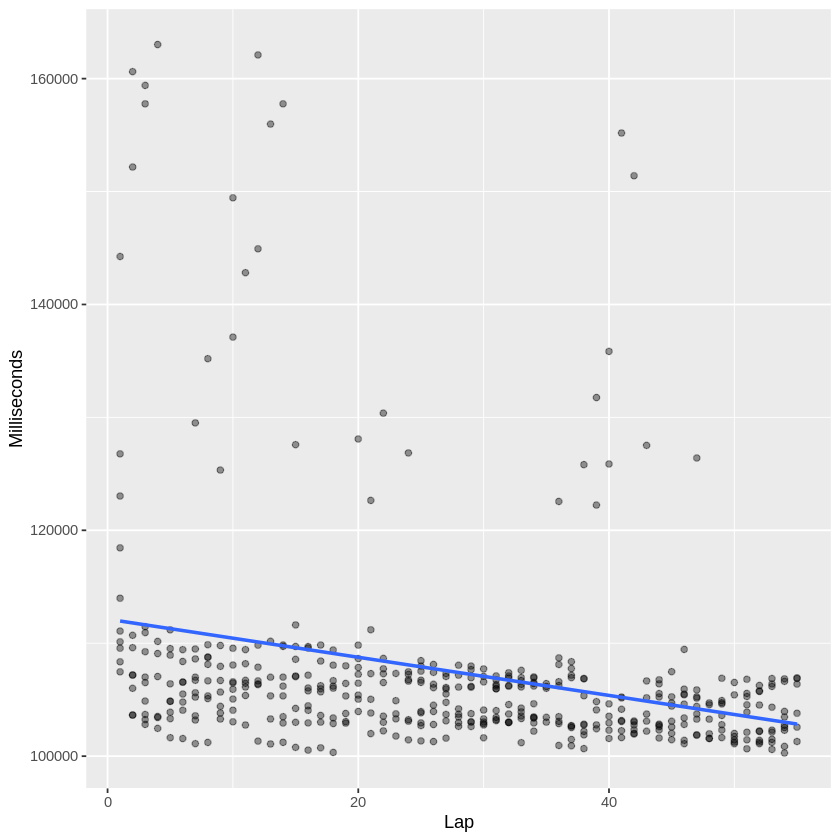

In [25]:
#22. Abu Dhabi

sv_uae <- vet_laps %>%
                filter(raceId %in% uae_race_ID) 

sv_uae_clean <- sv_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(12) %>%
                        filter(n != 58)
sv_uae_clean
sv_uae_clean_ID <- sv_uae_clean %>%
                        pull(raceId)

sv_uae_races <- vet_laps %>%
                    filter(raceId %in% sv_uae_clean_ID)

formulaone_split <- initial_split(sv_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uae_prediction()